In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [64]:
# write equations 
p2, p3, p4, p5, p6 = 15, 7.2, 0.05, 0.11, 2.9

stepsize = 0.0008

tau = int(1.5/stepsize)

def dadt(r, o, a_array, p1):
    return p1/(1+p2*r*o) - p3*a_array[-1]

def drdt(r, o, a):
    return (o*r)**2 / (p4+(o*r)**2) + p5 - p6*r

def dodt(r, o, a_array):
    return a_array[-tau] - o



initial_r = 0.1
initial_o = 0.1
a_array = np.zeros(tau+1)


def step(r, o, a_array, p1):
    r = r + drdt(r, o, a_array) * stepsize
    o = o + dodt(r, o, a_array) * stepsize
    a = a_array[-1] + dadt(r, o, a_array, p1)
    a_array = np.append(a_array, a)
    return r, o, a_array

r, o = initial_r, initial_o

rs = []
os = []

N_steps = 100000
p1 = np.array(26 + np.sin(2*np.pi/138.6294*np.arange(N_steps)*stepsize))

for i in range(10000):
    r, o, a_array = step(r, o, a_array, p1[i])
    rs.append(r)
    os.append(o)


C:\Users\jakob\AppData\Local\Temp\ipykernel_34184\2193487645.py:9: RuntimeWarning: overflow encountered in scalar multiply
  return p1/(1+p2*r*o) - p3*a_array[-1]
C:\Users\jakob\AppData\Local\Temp\ipykernel_34184\2193487645.py:27: RuntimeWarning: invalid value encountered in scalar add
  a = a_array[-1] + dadt(r, o, a_array, p1)
C:\Users\jakob\AppData\Local\Temp\ipykernel_34184\2193487645.py:12: RuntimeWarning: overflow encountered in scalar power
  return (o*r)**2 / (p4+(o*r)**2) + p5 - p6*r
C:\Users\jakob\AppData\Local\Temp\ipykernel_34184\2193487645.py:12: RuntimeWarning: invalid value encountered in scalar divide
  return (o*r)**2 / (p4+(o*r)**2) + p5 - p6*r


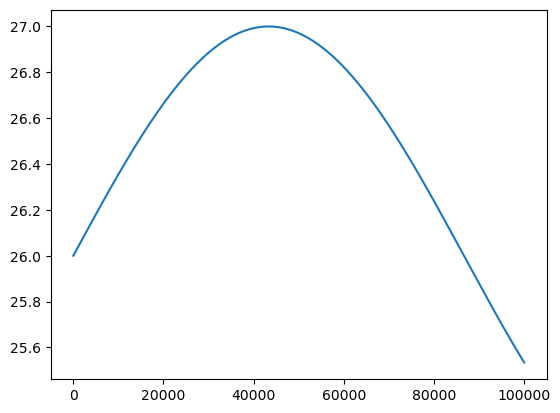

In [62]:
plt.plot(p1)

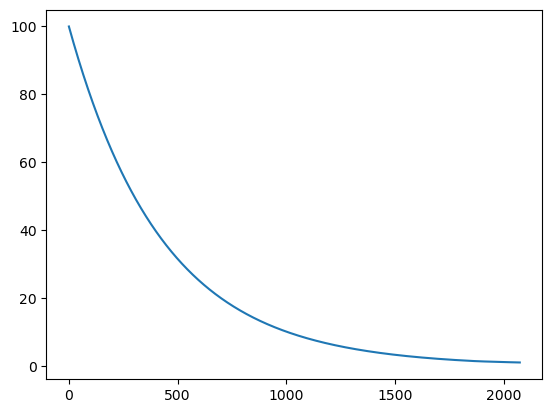

In [63]:
plt.plot(rs)
# plt.plot(os)

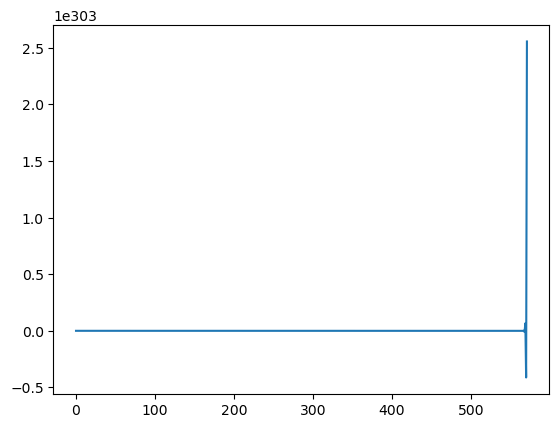

In [55]:
plt.plot(os)

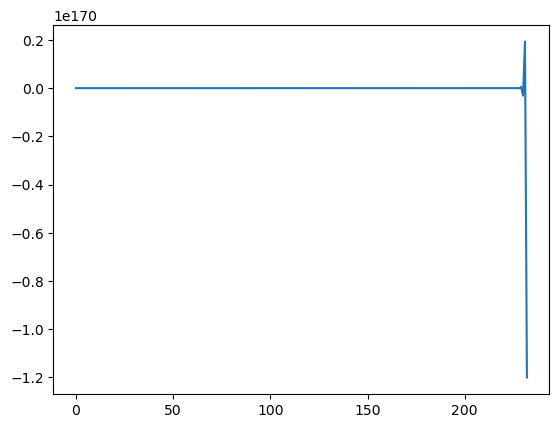

In [51]:
plt.plot(a_array)